In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('simulated_transaction_2024.csv')

bank.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [3]:
# get list of all merchants
bank['Third Party Name'].unique()

array(['Westport Care Home', 'Barbiee Boutique', nan, 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Fr

In [8]:
### Pre-process data only for merchant transactions out of the account (i.e. not salaries or personal transactions)

# Drop rows with positive transactions
merchant_transactions = bank[bank['Amount'] < 0]

# Drop all personal transactions, i.e. where 'Third Party Name' == NaN
merchant_transactions = merchant_transactions[merchant_transactions['Third Party Name'].notnull()]

merchant_transactions.tail()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon
230595,06/12/2023,21:32,259015404.0,1145.349837,-37.64,NaN,JustEat


### Cafe

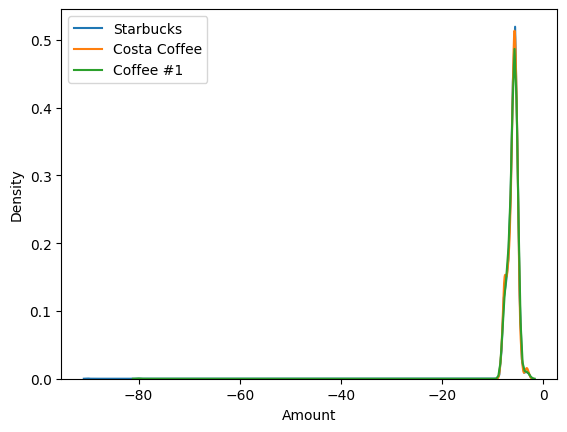

In [11]:
Starbucks = merchant_transactions[merchant_transactions['Third Party Name'] == 'Starbucks']
Costa_Coffee = merchant_transactions[merchant_transactions['Third Party Name'] == 'Costa Coffee']
Coffee_1 = merchant_transactions[merchant_transactions['Third Party Name'] == 'Coffee #1']

# plot kdensity plot for Starbucks
sns.kdeplot(Starbucks['Amount'], label='Starbucks')
sns.kdeplot(Costa_Coffee['Amount'], label='Costa Coffee')
sns.kdeplot(Coffee_1['Amount'], label='Coffee #1')

plt.legend()
plt.show()

- These all look sensible

### Game

<Axes: xlabel='Amount', ylabel='Density'>

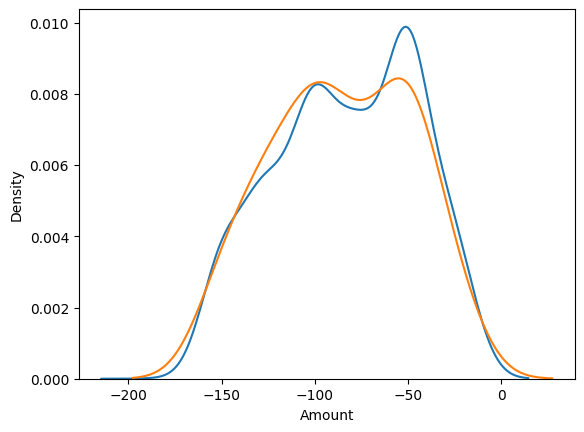

In [26]:
mojang_studios = merchant_transactions[merchant_transactions['Third Party Name'] == 'Mojang Studios']
xbox = merchant_transactions[merchant_transactions['Third Party Name'] == 'Xbox']
SquareOnix = merchant_transactions[merchant_transactions['Third Party Name'] == 'SquareOnix']
Blizzard = merchant_transactions[merchant_transactions['Third Party Name'] == 'Blizzard']
Gamestation = merchant_transactions[merchant_transactions['Third Party Name'] == 'Gamestation']
CeX = merchant_transactions[merchant_transactions['Third Party Name'] == 'CeX']
HMV = merchant_transactions[merchant_transactions['Third Party Name'] == 'HMV']

# plot kdensity plot for above gaming companies
#sns.kdeplot(mojang_studios['Amount'], label='Mojang Studios')
#sns.kdeplot(xbox['Amount'], label='Xbox')
#sns.kdeplot(SquareOnix['Amount'], label='SquareOnix')
#sns.kdeplot(Blizzard['Amount'], label='Blizzard')
sns.kdeplot(Gamestation['Amount'], label='Gamestation',bw_adjust=1.5)
sns.kdeplot(CeX['Amount'], label='CeX',bw_adjust=1.5)

- CeX and Gamestation are roughly aligned as they're similar types of store in terms of spending distributions

In [32]:
# concatenate describe() dataframes for all gaming companies
gaming_companies = pd.concat([mojang_studios['Amount'].describe(), 
                            xbox['Amount'].describe(), 
                            SquareOnix['Amount'].describe(), 
                            Blizzard['Amount'].describe(), 
                            HMV['Amount'].describe()], axis=1)
col_names = ['Mojang Studios', 'Xbox', 'SquareOnix', 'Blizzard','HMV']
gaming_companies.columns = col_names
gaming_companies

,Mojang Studios,Xbox,SquareOnix,Blizzard,HMV
count,4.369000e+03,4372.0,4.379000e+03,4.438000e+03,1.0
mean,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
std,8.882801e-16,0.0,1.776560e-15,1.776557e-15,NaN
min,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
25%,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
50%,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
75%,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
max,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0


- SquareOnix and Blizzard seem to comparable in terms of mean and variance in spend.
- Mojang studios and Xbox are similar in mean and variance in spend.
- HMV has only a single transaction?

### Pub

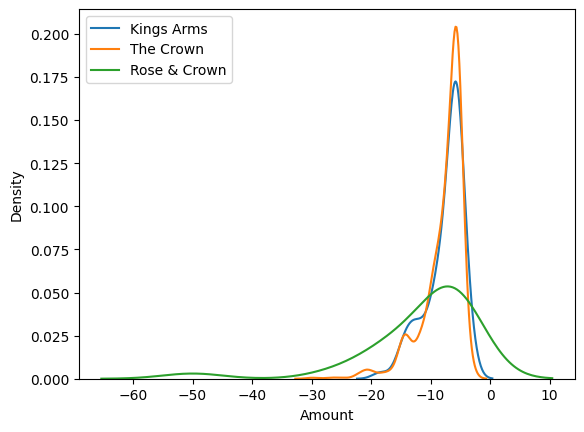

In [36]:
Kings_Arms = merchant_transactions[merchant_transactions['Third Party Name'] == 'Kings Arms']
The_Crown = merchant_transactions[merchant_transactions['Third Party Name'] == 'The Crown']
Rose_and_crown = merchant_transactions[merchant_transactions['Third Party Name'] == 'Rose & Crown']

# plot kdensity plot for above pubs
sns.kdeplot(Kings_Arms['Amount'], label='Kings Arms')
sns.kdeplot(The_Crown['Amount'], label='The Crown')
sns.kdeplot(Rose_and_crown['Amount'], label='Rose & Crown')

plt.legend()

plt.show()